# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name:

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [41]:
import numpy as np       # NumPy for numerical operations on arrays
import pandas as pd      # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt   # Matplotlib for basic plotting functionality
import seaborn as sns     # Seaborn for statistical data visualization
import yellowbrick       # Yellowbrick for machine learning visualization tools

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [42]:
# TODO: Import dataset and inspect the first five rows of the dataframe
# Define column names for better readability
column_names = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel',
                'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Class']

# Read the dataset from the 'seeds_dataset.txt' file into a pandas DataFrame
df = pd.read_table('seeds_dataset.txt', names=column_names)

# Display the first five rows of the DataFrame to inspect the data
df.head(5)

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [44]:

# TODO: Separate the data into a feature matrix (X) and a target vector (y).
# X contains all columns except 'Class', representing the features.
# y contains the 'Class' column, representing the target variable.
# Print the shape of X and y to inspect the dimensions of the data.
X = df.drop('Class', axis=1)
y = df['Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

*ANSWER HERE*

-- Given the absence of evidence indicating a normal distribution in the data and the potential presence of diverse scales, employing the MinMaxScaler would be the most advisable approach.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [46]:

# TODO: Split the data into training and testing sets using the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [47]:
# TODO: Print the shape of the training feature matrix and target vector

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (157, 7)
Shape of y_train: (157,)


Now that we have our training data, we can implement our selected scaler.

In [48]:
# TODO: Scale the data


# TODO: Scale the data using Min-Max scaling to ensure all features are on the same scale
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Transform the training data to the scaled version
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaling parameters
X_test_scaled = scaler.transform(X_test)

# Display the shape of the transformed training data
print("transformed shape: {}".format(X_train_scaled.shape))


transformed shape: (157, 7)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [50]:
# TODO: Instantiate model

#  Instantiate a Logistic Regression model with a maximum of 1000 iterations
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

#  Fit the model using scaled training data (X_train_scaled) and corresponding labels (y_train)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [15]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [51]:

# TODO: Implement the grid search using GridSearchCV to fine-tune model parameters.
# This will explore the parameter grid specified in 'param_grid' using 5-fold cross-validation.
# The best parameters, cross-validation score, and test score will be printed.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a GridSearchCV object with the specified model, parameter grid, and 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the training data
grid.fit(X_train_scaled, y_train)

# Print the best parameters found by the grid search
print("Best parameters:", grid.best_params_)

# Print the best cross-validation score achieved during the grid search
print("Best cross-validation score:", grid.best_score_)

# Evaluate the model on the test set and print the test set score
test_score = grid.score(X_test_scaled, y_test)
print("Test set score:", test_score)



Best parameters: {'C': 1.0, 'fit_intercept': True}
Best cross-validation score: 0.930241935483871
Test set score: 0.9245283018867925


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [52]:
# TODO: Predict y labels using best estimator


# TODO: Predict y labels using the best estimator obtained from grid search
# Grid search is assumed to have been performed earlier to find the best hyperparameters for the model
# X_test_scaled is the scaled test dataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Predicting y labels using the best estimator from grid search
y_pred = grid.best_estimator_.predict(X_test_scaled)



In [53]:


# TODO: Reduce the dimensions of the test data using Principal Component Analysis (PCA) for efficient plotting.
pca = PCA(n_components=2)  # Create a PCA object with 2 principal components
X_test_pca = pca.fit_transform(X_test_scaled)  # Apply PCA transformation to the scaled test data



In [54]:
# TODO: Plot test points colored by predicted label

print(X_test.shape)

print(X_test_pca.shape)

(53, 7)
(53, 2)


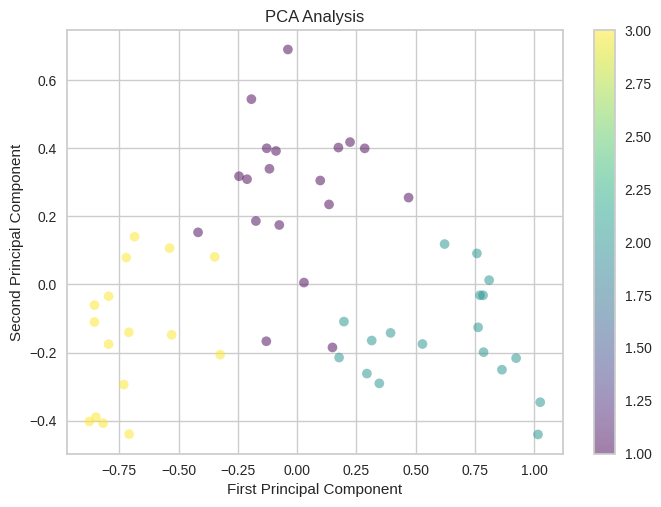

In [55]:
# TODO: Plot test points colored by predicted label
# Scatter plot of the test data in the reduced PCA space, with color-coded predicted labels
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_pred,  # Predicted labels used for color mapping
            cmap='viridis',  # Color map for the scatter plot
            edgecolor='none',  # No edge color for data points
            alpha=0.5)  # Set transparency for better visualization

# Set plot title and axis labels
plt.title('PCA Analysis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a color bar to the plot for reference
plt.colorbar()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. I am confident that the effectiveness of this model was satisfactory for the given dataset. The high and comparable scores in both the training and testing data suggest minimal bias and variance. This affirms that the model neither underfits nor overfits the training data.

2.the performance of PCA seems promising in this context. Examining the scatter plot reveals well-defined groupings for all three predicted labels (classes). Given the linearity of both PCA and logistic regression, coupled with our positive outcomes, we can infer that this dataset exhibits linear characteristics.








### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



Answers :
1. The code utilized for this task was derived from the lab and examples presented during class.

2. I sequentially completed all the required steps for this assignment.

3. Employing generative AI, I obtained cmap options for the scatter plot to ensure optimal visibility of all three classes—avoiding overly light colors and ensuring clear differentiation between classes by avoiding similar hues.
The prompt was straightforward, asking about available cmap options for matplotlib.pyplot scatter plots. It's essential to clarify that generative AI was not employed to generate any actual code.

4 The examples provided in class and during lab sessions proved highly beneficial, facilitating a smooth progression through the assignment with minimal difficulties.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [56]:
# TODO: Scale feature matrixx

# Importing necessary library for data preprocessing
from sklearn.preprocessing import StandardScaler

# Defining the column names for the dataset
column_names = ['Area', 'Perimeter', 'Compactness', 'Length_of_kernel', 'Width_of_kernel',
                'Asymmetry_coefficient', 'Length_of_kernel_groove', 'Class']

# Reading the dataset from a text file into a pandas DataFrame
df = pd.read_table('seeds_dataset.txt', names=column_names)

# Separating features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Initializing a StandardScaler to standardize the features
scaler = StandardScaler()

# Standardizing the feature matrix (X)
X_scaled = scaler.fit_transform(X)



The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

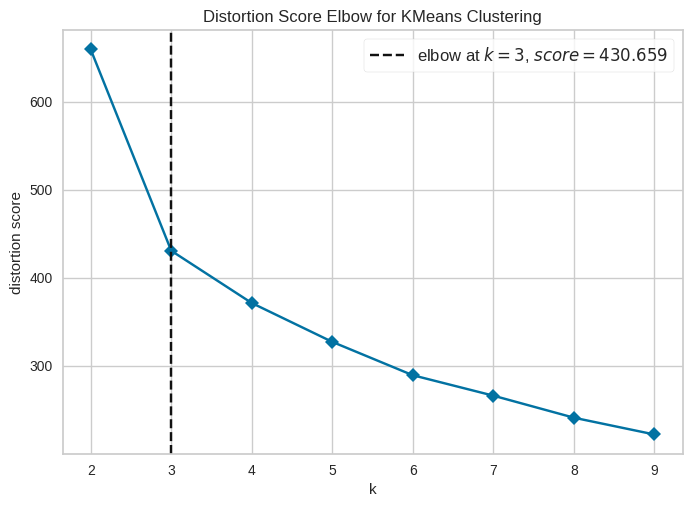

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# TODO: Use the elbow method to determine the optimal number of clusters


# TODO: Use the elbow method to determine the optimal number of clusters

# Importing necessary libraries for clustering analysis
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initializing KElbowVisualizer with KMeans clustering algorithm
# Set random_state for reproducibility and specify the number of initializations
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='distortion', timings=False)

# Fit the visualizer on the scaled data to perform the elbow method analysis
visualizer.fit(X_scaled)

# Display the elbow plot to help identify the optimal number of clusters
visualizer.show()


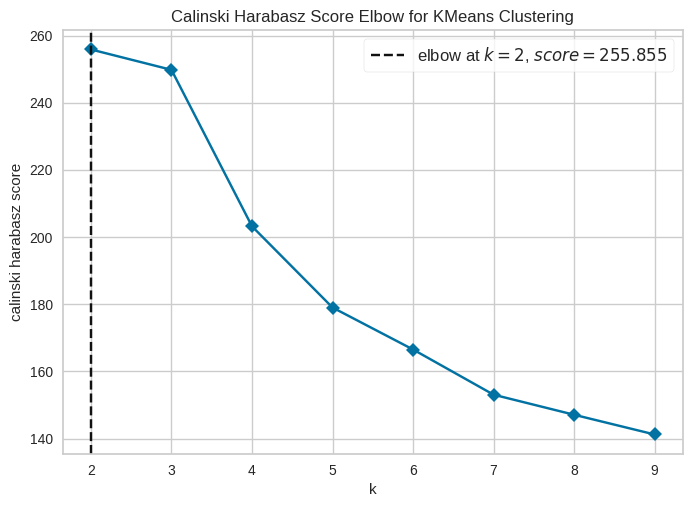

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [58]:
#Calinksi Harabasz
# Using the KElbowVisualizer to determine the optimal number of clusters (k) for KMeans clustering.
# KMeans is initialized with a random state of 4 and 10 initialization attempts.
# The metric used for evaluation is the Calinski-Harabasz index.
# X_scaled represents the scaled input data.
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2, 10), metric='calinski_harabasz', timings=False)

# Fitting the visualizer on the scaled data to analyze different values of k.
visualizer.fit(X_scaled)

# Displaying the elbow plot to visualize the optimal number of clusters.
visualizer.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [59]:
# TODO: Implement K-means with the number of clusters determined in the previous step
# Using KMeans clustering with 2 clusters and setting the random seed for reproducibility
kmeans = KMeans(n_clusters=2, random_state=0)

# Fitting the KMeans model to the scaled data (X_scaled)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [60]:
# TODO: Calculate the three different validation metrics


# TODO: Calculate the three different validation metrics for the clustering results

# Using the Silhouette score to measure the quality of clusters
silhouette_cluster = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_cluster}")

# Using the Calinski-Harabasz score to assess the separation between clusters
calinski_harabasz_cluster = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_cluster}")

# Using the Davies-Bouldin score to evaluate the compactness and separation of clusters
davies_bouldin_cluster = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {davies_bouldin_cluster}")


Silhouette Score: 0.46577247686580914
Calinski-Harabasz Score: 255.85482678628833
Davies-Bouldin Score: 0.7968788694686015


In [64]:
# Applied k-means clustering with k=3 to the scaled data

kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(X_scaled)

# Obtained cluster labels
labels_3 = kmeans_3.labels_

# Calculated Silhouette score to evaluate the quality of clustering
silhouette_3_cluster = silhouette_score(X_scaled, labels_3)
print(f"Silhouette Score for k=3: {silhouette_3_cluster}")

# Calculated Calinski-Harabasz score for additional clustering evaluation
calinski_harabasz_3_cluster = calinski_harabasz_score(X_scaled, labels_3)
print(f"Calinski-Harabasz Score for k=3: {calinski_harabasz_3_cluster}")

# Calculated Davies-Bouldin score for further assessment of clustering quality
davies_bouldin_3_cluster = davies_bouldin_score(X_scaled, labels_3)
print(f"Davies-Bouldin Score for k=3: {davies_bouldin_3_cluster}")


Silhouette Score for k=3: 0.40072705527512986
Calinski-Harabasz Score for k=3: 249.7841749161647
Davies-Bouldin Score for k=3: 0.9278712249013426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

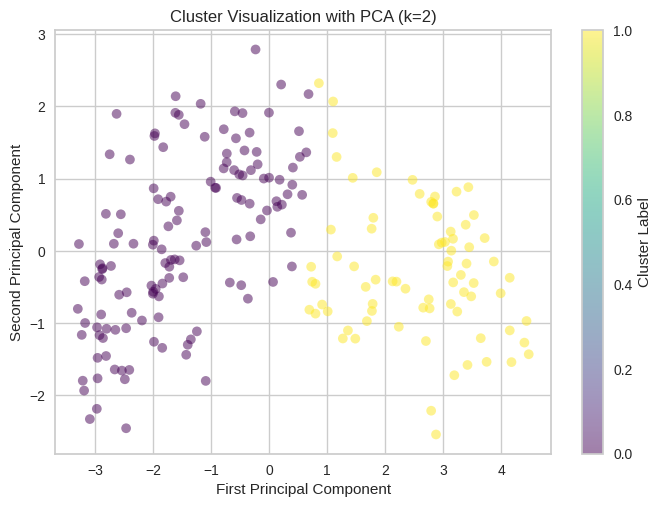

In [65]:

# TODO: Plot clustering results

# Apply PCA to reduce the dimensionality of the data to 2 components
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster labels using the k-means algorithm
cluster_labels = kmeans.predict(X_scaled)

# Plot the results using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=cluster_labels,                # Color points based on cluster labels
            cmap='viridis',                  # Choose the color map for better visualization
            marker='o',                      # Set marker style for data points
            edgecolor='none',                # Remove edge color for better aesthetics
            alpha=0.5)                       # Set transparency for better visibility

# Set plot title and axis labels
plt.title('Cluster Visualization with PCA (k=2)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add colorbar to show the correspondence between colors and cluster labels
plt.colorbar(label='Cluster Label')

# Display the plot
plt.show()


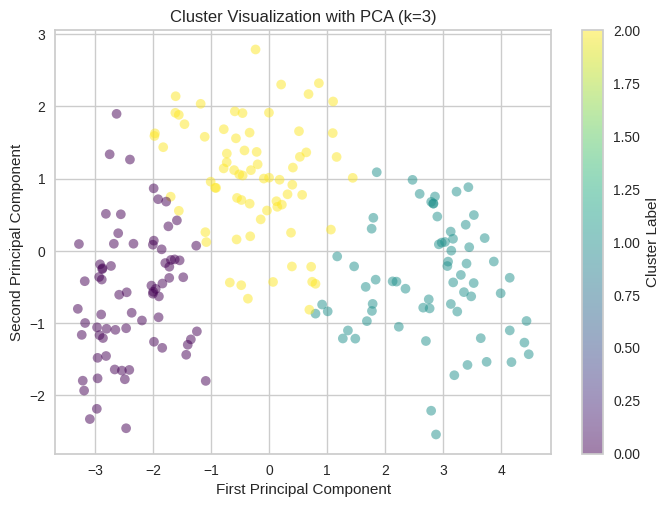

In [66]:
# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(2)

# Transform the scaled data using PCA
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster labels using k-means with k=3
cluster_labels_3 = kmeans_3.predict(X_scaled)

# Plot the results in a scatter plot using the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=cluster_labels_3,            # Color points based on cluster labels
            cmap='viridis',                # Use the 'viridis' colormap
            marker='o',                    # Set marker style to circles
            edgecolor='none',              # Disable edge colors for better visibility
            alpha=0.5)                      # Set point transparency for a clearer plot

# Set plot title and axis labels
plt.title('Cluster Visualization with PCA (k=3)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a colorbar to the plot indicating cluster labels
plt.colorbar(label='Cluster Label')

# Display the plot
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [67]:
# TODO: Find the number of principal components using explained variance ratio

# Perform Principal Component Analysis (PCA) on the scaled data (X_scaled)
# to capture 95% of the cumulative explained variance. This helps in reducing
# the dimensionality of the data while retaining most of its information.
pca = PCA().fit(X_scaled)

# Calculate the cumulative sum of explained variance ratios
variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of principal components required to capture at least 95%
# of the variance in the data by finding the index where the cumulative sum
# exceeds or equals 0.95. The result is stored in the variable 'n'.
n = np.where(variance_ratio >= 0.95)[0][0] + 1


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [69]:
# TODO: Use PCA to transform the data

# Perform Principal Component Analysis (PCA) with 'n' components on the scaled feature matrix 'X_scaled'
pca = PCA(n)
# Transform the original scaled feature matrix 'X_scaled' into the reduced-dimensional space using PCA
X_pca = pca.fit_transform(X_scaled)


In [71]:
# TODO: Implement K-means with the transformed data

#Implement K-means clustering using the transformed data (X_pca).
# Set the number of clusters (n_clusters) to 2 and use a fixed random state (random_state=0) for reproducibility.
kmeans_pca = KMeans(n_clusters=2, random_state=0).fit(X_pca)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:


# TODO: Calculate the three different validation metrics

# Get the labels assigned by k-means clustering on PCA-transformed data
labels_pca = kmeans_pca.labels_

# Calculate the Silhouette Score, which measures how well-separated the clusters are
silhouette_pca = silhouette_score(X_pca, labels_pca)

# Calculate the Calinski-Harabasz Score, which evaluates the ratio of between-cluster to within-cluster dispersion
calinski_harabasz_pca = calinski_harabasz_score(X_pca, labels_pca)

# Calculate the Davies-Bouldin Score, which measures the average similarity between each cluster and its most similar cluster
davies_bouldin_pca = davies_bouldin_score(X_pca, labels_pca)

# Output the calculated scores
print(f"Silhouette Score: {silhouette_pca}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_pca}")
print(f"Davies-Bouldin Score: {davies_bouldin_pca}")


Silhouette Score: 0.4730808939247533
Calinski-Harabasz Score: 263.44636477730086
Davies-Bouldin Score: 0.7813442430910825


In [73]:
# Applying K-means clustering with k=3 on the dataset reduced to its principal components using PCA
kmeans_3_pca = KMeans(n_clusters=3, random_state=0).fit(X_pca)

# Retrieving cluster labels from the K-means clustering results
labels_3_pca = kmeans_pca.labels_

# Computing clustering performance metrics
silhouette_3_pca = silhouette_score(X_pca, labels_3_pca)
calinski_harabasz_3_pca = calinski_harabasz_score(X_pca, labels_3_pca)
davies_bouldin_3_pca = davies_bouldin_score(X_pca, labels_3_pca)

# Outputting the computed scores for evaluation
print(f"Silhouette Score: {silhouette_3_pca}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_3_pca}")
print(f"Davies-Bouldin Score: {davies_bouldin_3_pca}")


Silhouette Score: 0.4730808939247533
Calinski-Harabasz Score: 263.44636477730086
Davies-Bouldin Score: 0.7813442430910825


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [75]:
# TODO: Display results

# Creating dictionaries and DataFrames to store and display KMeans clustering evaluation metrics for k=2 and k=3.

# Results for k=2
results_2 = {
    'Silhouette Score without PCA': silhouette_cluster,
    'Silhouette Score with PCA': silhouette_pca,
    'Calinski-Harabasz Score without PCA': calinski_harabasz_cluster,
    'Calinski-Harabasz Score with PCA': calinski_harabasz_pca,
    'Davies-Bouldin Score without PCA': davies_bouldin_cluster,
    'Davies-Bouldin Score with PCA': davies_bouldin_pca
}

# Creating a DataFrame for k=2 results
results_df_2 = pd.DataFrame(list(results_2.items()), columns=['Metric', 'Value'])

# Displaying results for k=2
print("KMeans Clustering Results for k=2\n")
print(results_df_2)

# Results for k=3
results_3 = {
    'Silhouette Score without PCA': silhouette_3_cluster,
    'Silhouette Score with PCA': silhouette_3_pca,
    'Calinski-Harabasz Score without PCA': calinski_harabasz_3_cluster,
    'Calinski-Harabasz Score with PCA': calinski_harabasz_3_pca,
    'Davies-Bouldin Score without PCA': davies_bouldin_3_cluster,
    'Davies-Bouldin Score with PCA': davies_bouldin_3_pca
}

# Creating a DataFrame for k=3 results
results_df_3 = pd.DataFrame(list(results_3.items()), columns=['Metric', 'Value'])

# Displaying results for k=3
print("\n\nKMeans Clustering Results for k=3\n")
print(results_df_3)


KMeans Clustering Results for k=2

                                Metric       Value
0         Silhouette Score without PCA    0.465772
1            Silhouette Score with PCA    0.473081
2  Calinski-Harabasz Score without PCA  255.854827
3     Calinski-Harabasz Score with PCA  263.446365
4     Davies-Bouldin Score without PCA    0.796879
5        Davies-Bouldin Score with PCA    0.781344


KMeans Clustering Results for k=3

                                Metric       Value
0         Silhouette Score without PCA    0.400727
1            Silhouette Score with PCA    0.473081
2  Calinski-Harabasz Score without PCA  249.784175
3     Calinski-Harabasz Score with PCA  263.446365
4     Davies-Bouldin Score without PCA    0.927871
5        Davies-Bouldin Score with PCA    0.781344


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*


1 .Given that the original dataset featured three class labels, it is logical that one of the optimal cluster numbers was three, as indicated by the Distortion score. Nevertheless, utilizing 2 as the cluster count still yielded comparable results, as depicted above.

2. the plots exhibit similar distributions for the three classes when contrasted with the outcomes for k=3 in Part 2. However, comparing the results from Part 1 with those from Part 2 for k=2 is not feasible since the results are inherently incomparable, given the distinction between 3 classes and 2 clusters.

3. To account for at least 95% of the variance, two components were employed. Generally, employing PCA resulted in an enhancement of results. Nonetheless, for both k=2 and k=3, the Davies-Bouldin score decreased with PCA usage. This improvement can be attributed to the curse of dimensionality, where reducing the number of features typically enhances clustering accuracy.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code for this section of the task was drawn from both in-class and lab examples. Additionally, references were made to code snippets from Stack Overflow and online documentation.

2. The steps outlined for this phase of the assignment were executed in the sequence in which they were presented.

3. No generative AI techniques were employed in completing this segment of the assignment.

4. The most challenging aspect of this particular task involved the decision-making process regarding whether to use k=2 or k=3. This decision was complicated by the fact that two out of the three elbow method scores (k=3 for Distortion and k=2 for Silhouette and Calinski Harabasz) suggested k=2, even though the dataset had three class labels.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

 1. enjoyed observing the effect of PCA on clustering and how the scores improved with the reduction of the number of features.


 2. I found the results of the elbow method and the validation metrics to be confusing as the number of clusters did not have a huge effect on the results. Thus, it was unclear whether k=2 or k=3 was the optimal choice. However, based on the original dataset having 3 class labels, it persuaded me to consider concluding that k=3 was the better option (for k=2 and k=3 with PCA, the results were identical).